<a href="https://colab.research.google.com/github/tavaresRamon/HAR-DL-LSTM-vs-CNN/blob/main/Aplica%C3%A7%C3%A3oTrabalhoTopicosEspeciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================================================================
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import zipfile
import io

# Configuração de estilo "Acadêmico"
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 9,
    'figure.titlesize': 14,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

# Pasta para salvar figuras
if not os.path.exists('figuras_artigo'):
    os.makedirs('figuras_artigo')

# ==============================================================================
# 2. DOWNLOAD AUTOMÁTICO E EXTRAÇÃO DOS DADOS (UCI HAR)
# ==============================================================================
def baixar_dados_uci():
    """Baixa e extrai o dataset UCI HAR automaticamente."""
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
    caminho_pasta = 'UCI HAR Dataset'

    if not os.path.exists(caminho_pasta):
        print(">>> Baixando dataset UCI HAR (aprox. 60MB)... aguarde.")
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()
        print(">>> Download e extração concluídos!")
    else:
        print(">>> Dataset já encontrado no diretório.")

baixar_dados_uci()

# ==============================================================================
# 3. FUNÇÕES DE CARREGAMENTO (ESTRUTURAÇÃO DOS TENSORES 3D)
# ==============================================================================
# Para LSTM, precisamos de dados no formato: (Amostras, Passos_Tempo, Características)
# No nosso caso: (N, 128, 9)

def carregar_arquivo_sinal(tipo_arquivo, grupo='train'):
    """Carrega um único arquivo de sinal inercial."""
    caminho = f'UCI HAR Dataset/{grupo}/Inertial Signals/{tipo_arquivo}_{grupo}.txt'
    # Carrega como float32 para economizar memória e ser compatível com PyTorch/Tensorflow
    return pd.read_csv(caminho, delim_whitespace=True, header=None).values

def carregar_grupo_dados(grupo='train'):
    """
    Carrega todos os 9 sinais (Acc e Gyro nos eixos X,Y,Z) e empilha.
    Retorna X (sinais) e y (rótulos).
    """
    print(f"Carregando dados do grupo: {grupo}...")

    # Lista dos 9 arquivos de sinais brutos
    nomes_arquivos = [
        "body_acc_x", "body_acc_y", "body_acc_z",
        "body_gyro_x", "body_gyro_y", "body_gyro_z",
        "total_acc_x", "total_acc_y", "total_acc_z"
    ]

    # Carrega cada um e coloca numa lista
    lista_sinais = [carregar_arquivo_sinal(nome, grupo) for nome in nomes_arquivos]

    # Empilha os sinais para criar o tensor 3D: (Amostras, 128, 9)
    # dstack transforma listas de matrizes 2D em um array 3D
    X_sinais = np.dstack(lista_sinais)

    # Carrega os rótulos (Y)
    caminho_y = f'UCI HAR Dataset/{grupo}/y_{grupo}.txt'
    y_rotulos = pd.read_csv(caminho_y, delim_whitespace=True, header=None).values

    return X_sinais, y_rotulos

# --- Execução do Carregamento ---
X_treino, y_treino = carregar_grupo_dados('train')
X_teste, y_teste = carregar_grupo_dados('test')

# Mapeamento das atividades (Para gráficos legíveis)
rotulos_atividades = {
    1: 'Caminhando',
    2: 'Subindo Escadas',
    3: 'Descendo Escadas',
    4: 'Sentado',
    5: 'Em Pé',
    6: 'Deitado'
}

print("\n=== Dimensões dos Dados (Fundamentais para a LSTM) ===")
print(f"X_treino (Amostras, Janela Temporal, Sensores): {X_treino.shape}")
print(f"y_treino (Amostras, 1): {y_treino.shape}")
print(f"X_teste  (Amostras, Janela Temporal, Sensores): {X_teste.shape}")
print("-" * 30)

# ==============================================================================
# 4. ANÁLISE EXPLORATÓRIA (GRÁFICOS PARA O ARTIGO)
# ==============================================================================

# --- Gráfico 1: Balanceamento das Classes ---
def plotar_balanceamento(y_dados, nome_figura):
    df_y = pd.DataFrame(y_dados, columns=['id_atividade'])
    df_y['Atividade'] = df_y['id_atividade'].map(rotulos_atividades)

    plt.figure(figsize=(8, 5))
    # Usando paleta cinza/azul para seriedade acadêmica
    sns.countplot(y='Atividade', data=df_y, palette='ch:s=.25,rot=-.25', hue='Atividade', legend=False)
    plt.title('Distribuição das Classes no Conjunto de Treino', fontweight='bold')
    plt.xlabel('Quantidade de Amostras')
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'figuras_artigo/{nome_figura}.pdf')
    plt.show()


>>> Baixando dataset UCI HAR (aprox. 60MB)... aguarde.
>>> Download e extração concluídos!
Carregando dados do grupo: train...


/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None)

Carregando dados do grupo: test...


/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None)


=== Dimensões dos Dados (Fundamentais para a LSTM) ===
X_treino (Amostras, Janela Temporal, Sensores): (7352, 128, 9)
y_treino (Amostras, 1): (7352, 1)
X_teste  (Amostras, Janela Temporal, Sensores): (2947, 128, 9)
------------------------------


/tmp/ipython-input-2609730200.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(caminho, delim_whitespace=True, header=None).values
/tmp/ipython-input-2609730200.py:87: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_rotulos = pd.read_csv(caminho_y, delim_whitespace=True, header=None).values


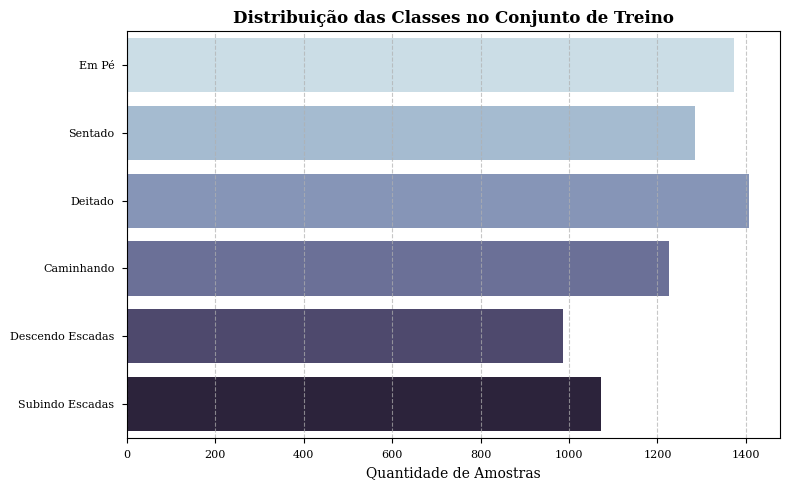

In [ ]:
# --- AQUI ESTÁ A LINHA QUE FALTAVA ---
# Chama a função passando os dados carregados e o nome do arquivo
plotar_balanceamento(y_treino, 'fig_balanceamento')

In [ ]:
# ==============================================================================
# ATUALIZAÇÃO: PLOTAGEM DE SINAIS (COMPARAÇÃO X, Y, Z)
# ==============================================================================

def plotar_atividade_tres_eixos(atividade_id, nome_figura):
    """
    Plota X, Y e Z juntos para mostrar a complexidade do movimento.
    Isso fica MUITO BOM na seção de metodologia.
    """
    # Encontra o índice da primeira amostra dessa atividade
    indice = np.where(y_treino == atividade_id)[0][0]

    # Extrai os dados: (128 passos, 3 canais: 0=X, 1=Y, 2=Z)
    sinal_x = X_treino[indice, :, 0]
    sinal_y = X_treino[indice, :, 1]
    sinal_z = X_treino[indice, :, 2]

    plt.figure(figsize=(12, 4))
    plt.plot(sinal_x, label='Eixo X', linewidth=1.5, alpha=0.9)
    plt.plot(sinal_y, label='Eixo Y', linewidth=1.5, alpha=0.9, linestyle='--')
    plt.plot(sinal_z, label='Eixo Z', linewidth=1.5, alpha=0.9, linestyle=':')

    plt.title(f'Dinâmica Tridimensional: {rotulos_atividades[atividade_id]} (Aceleração Corporal)', fontsize=12, fontweight='bold')
    plt.xlabel('Tempo (128 leituras)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.xlim(0, 128)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'figuras_artigo/{nome_figura}.pdf')
    plt.show()


>>> Gerando gráfico detalhado (X, Y, Z) para demonstrar complexidade...


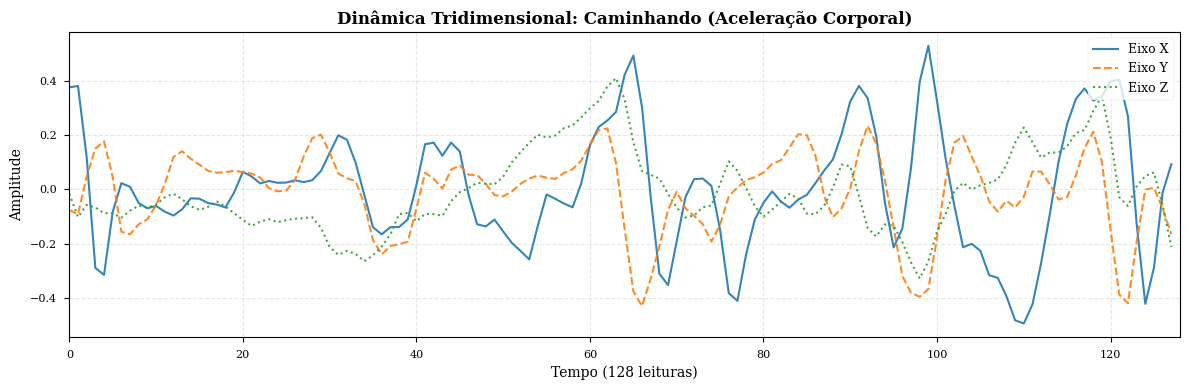

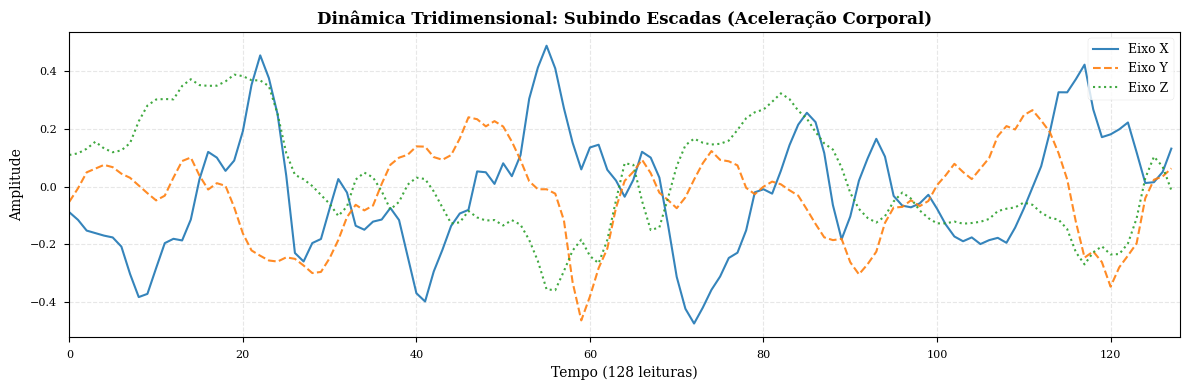

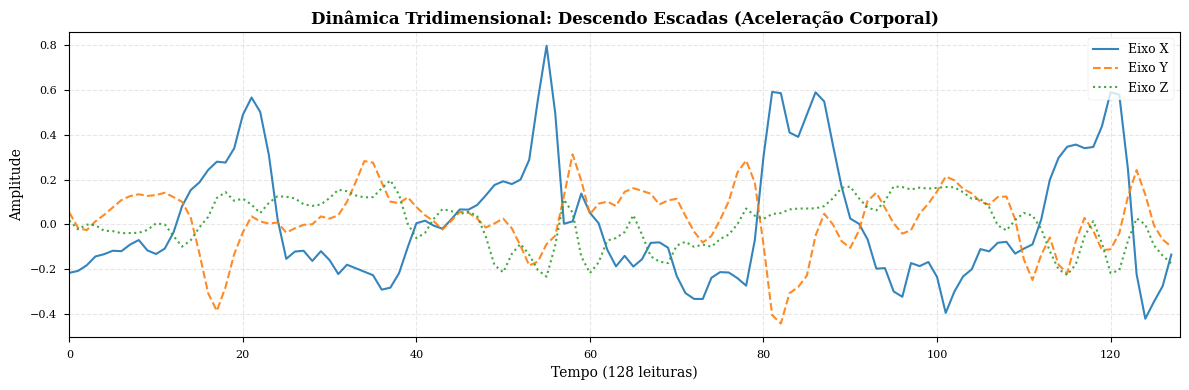

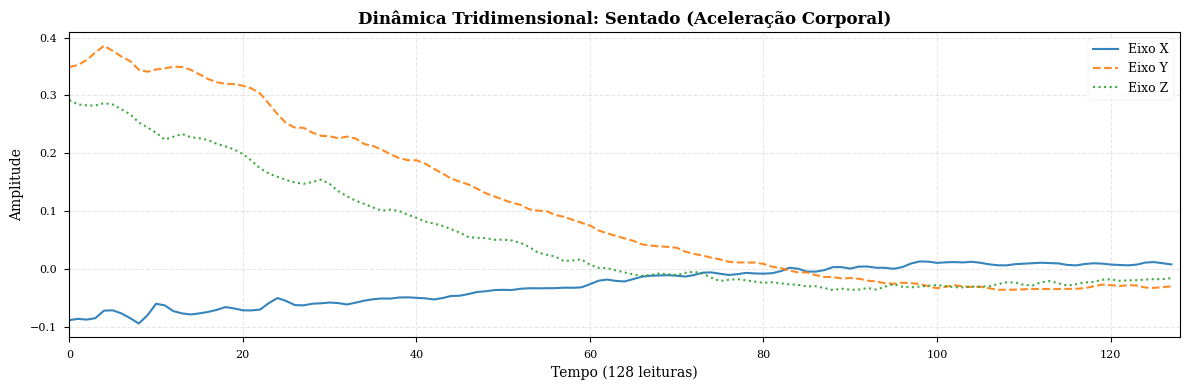

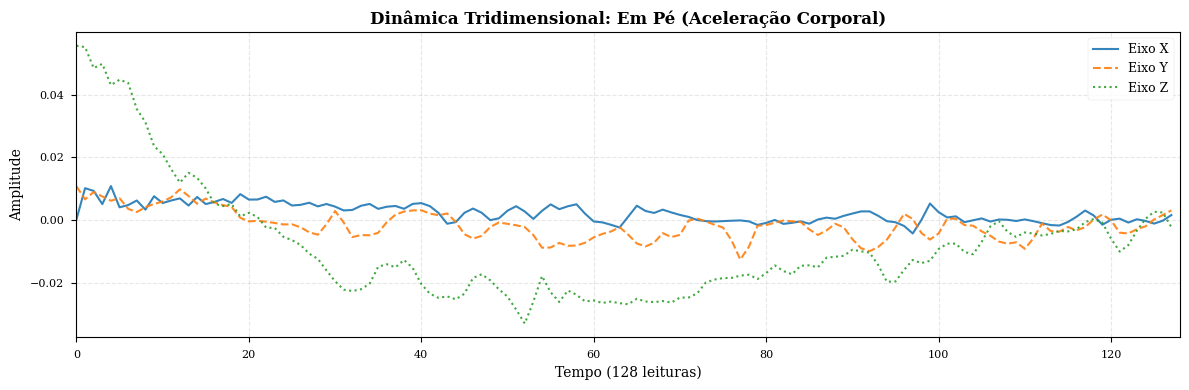

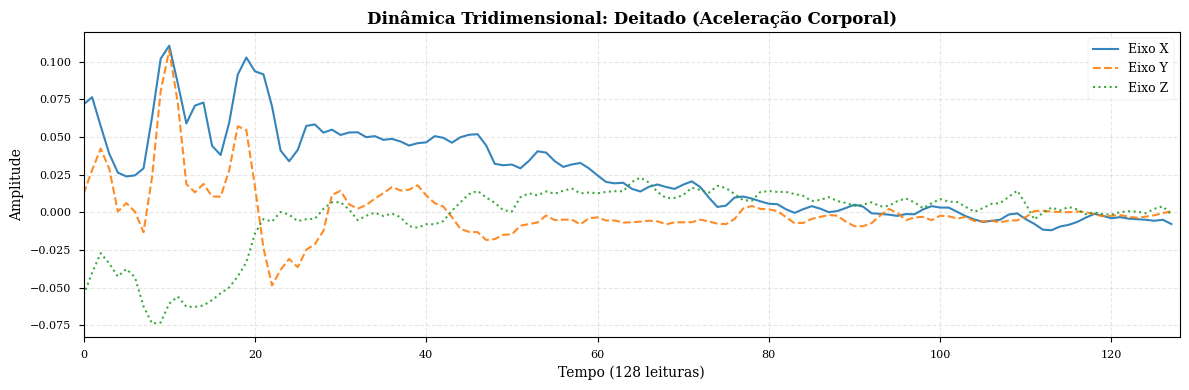

In [ ]:
print(">>> Gerando gráfico detalhado (X, Y, Z) para demonstrar complexidade...")
# Escolhi "Subindo Escadas" pois costuma ter variação nos 3 eixos
plotar_atividade_tres_eixos(1, 'fig8_detalhe_multivariado')
plotar_atividade_tres_eixos(2, 'fig8_detalhe_multivariado')
plotar_atividade_tres_eixos(3, 'fig8_detalhe_multivariado')
plotar_atividade_tres_eixos(4, 'fig8_detalhe_multivariado')
plotar_atividade_tres_eixos(5, 'fig8_detalhe_multivariado')
plotar_atividade_tres_eixos(6, 'fig8_detalhe_multivariado')

In [67]:
# ==============================================================================
# GERAÇÃO DE FIGURA: PAINEL DE SÉRIES TEMPORAIS (SUBSTITUI O 3D)
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuração Estética
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'legend.fontsize': 8,
    'figure.dpi': 300
})

if not os.path.exists('figuras_artigo'):
    os.makedirs('figuras_artigo')

# Mapeamento
rotulos = {1:'Caminhando', 2:'Subindo', 3:'Descendo', 4:'Sentado', 5:'Em Pé', 6:'Deitado'}

def gerar_painel_sinais_2x3(X, y):
    print(">>> Gerando Painel de Sinais Temporais (2x3)...")

    fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True, sharey=True)
    axes = axes.flatten()

    # Cores para X, Y, Z
    cores = ['#e74c3c', '#2ecc71', '#3498db'] # Vermelho, Verde, Azul

    for i, ativ_id in enumerate([1, 2, 3, 4, 5, 6]):
        ax = axes[i]

        # Pega a primeira amostra disponível desta classe
        idx = np.where(y == ativ_id)[0][10] # Pega a 10ª para evitar ruído inicial

        # Dados: (128 steps, 3 canais) -> Acc Corporal
        sinal_x = X[idx, :, 0]
        sinal_y = X[idx, :, 1]
        sinal_z = X[idx, :, 2]
        tempo = np.arange(128)

        # Plotagem
        ax.plot(tempo, sinal_x, color=cores[0], lw=1.2, label='X', alpha=0.8)
        ax.plot(tempo, sinal_y, color=cores[1], lw=1.2, label='Y', alpha=0.8, ls='--')
        ax.plot(tempo, sinal_z, color=cores[2], lw=1.2, label='Z', alpha=0.8, ls=':')

        # Estética
        tipo = "DINÂMICA" if ativ_id <= 3 else "ESTÁTICA"
        ax.set_title(f"{rotulos[ativ_id]} ({tipo})", fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')

        if i >= 3: ax.set_xlabel("Tempo (steps)")
        if i % 3 == 0: ax.set_ylabel("Amplitude (g)")

        # Legenda apenas no primeiro gráfico para limpar
        if i == 0: ax.legend(loc='upper right', frameon=True)

    plt.tight_layout()
    plt.savefig('figuras_artigo/fig_sinais_temporal_grid.png', bbox_inches='tight')
    plt.close()
    print(">>> Figura 'fig_sinais_temporal_grid.png' salva com sucesso!")

# EXECUÇÃO (Requer X_treino e y_treino na memória)
try:
    gerar_painel_sinais_2x3(X_treino, y_treino)
except NameError:
    print("ERRO: Certifique-se de que X_treino e y_treino estão carregados.")

>>> Gerando Painel de Sinais Temporais (2x3)...
>>> Figura 'fig_sinais_temporal_grid.png' salva com sucesso!


In [ ]:
# ==============================================================================
# 5. CONSOLIDAÇÃO DA ANÁLISE DE DADOS (TABELA RESUMO)
# ==============================================================================
import pandas as pd

# Pasta para salvar CSV
if not os.path.exists('imagens_artigo'):
    os.makedirs('imagens_artigo')
# Criando um DataFrame resumo para colocar no relatório
dados_resumo = {
    'Aspecto': [
        'Total de Amostras (Treino)',
        'Total de Amostras (Teste)',
        'Janela de Tempo (Time Steps)',
        'Frequência de Amostragem',
        'Duração da Janela',
        'Canais de Entrada (Features)',
        'Classes de Saída (Labels)',
        'Tipo de Problema'
    ],
    'Valor': [
        f"{X_treino.shape[0]}",
        f"{X_teste.shape[0]}",
        f"{X_treino.shape[1]} passos",
        "50 Hz",
        "2.56 segundos",
        f"{X_treino.shape[2]} (3 Acc Corpo, 3 Acc Total, 3 Gyro)",
        "6 Atividades",
        "Classificação Multiclasse (Série Temporal)"
    ],
    'Descrição': [
        'Vídeos/Segmentos usados para aprender',
        'Vídeos/Segmentos para avaliar performance',
        'Leituras sequenciais por amostra',
        'Leituras por segundo',
        'Tempo total de movimento capturado',
        'Sensores simultâneos (X, Y, Z)',
        'Caminhar, Subir, Descer, Sentar, Em Pé, Deitar',
        'Prever categoria baseado em sequência'
    ]
}

df_resumo_tecnico = pd.DataFrame(dados_resumo)

# Salvando para usar no Quarto/RMarkdown
df_resumo_tecnico.to_csv('imagens_artigo/tabela_resumo_dados.csv', index=False)

print("\n--- Tabela 1: Resumo das Características do Dataset ---")
# Exibindo formatado para você ler agora
print(df_resumo_tecnico.to_markdown(index=False))

# ==============================================================================
# 6. DETALHAMENTO DAS 9 CARACTERÍSTICAS (FEATURES)
# ==============================================================================
features_list = [
    "1. Body Acceleration X (Aceleração Corporal Eixo X)",
    "2. Body Acceleration Y (Aceleração Corporal Eixo Y)",
    "3. Body Acceleration Z (Aceleração Corporal Eixo Z)",
    "4. Body Gyroscope X (Velocidade Angular Eixo X)",
    "5. Body Gyroscope Y (Velocidade Angular Eixo Y)",
    "6. Body Gyroscope Z (Velocidade Angular Eixo Z)",
    "7. Total Acceleration X (Gravidade + Corpo Eixo X)",
    "8. Total Acceleration Y (Gravidade + Corpo Eixo Y)",
    "9. Total Acceleration Z (Gravidade + Corpo Eixo Z)"
]

print("\n--- Detalhamento das Variáveis de Entrada (X) ---")
for f in features_list:
    print(f)


--- Tabela 1: Resumo das Características do Dataset ---
| Aspecto                      | Valor                                      | Descrição                                      |
|:-----------------------------|:-------------------------------------------|:-----------------------------------------------|
| Total de Amostras (Treino)   | 7352                                       | Vídeos/Segmentos usados para aprender          |
| Total de Amostras (Teste)    | 2947                                       | Vídeos/Segmentos para avaliar performance      |
| Janela de Tempo (Time Steps) | 128 passos                                 | Leituras sequenciais por amostra               |
| Frequência de Amostragem     | 50 Hz                                      | Leituras por segundo                           |
| Duração da Janela            | 2.56 segundos                              | Tempo total de movimento capturado             |
| Canais de Entrada (Features) | 9 (3 Acc Corpo, 3 Acc

>>> Gerando Painel 3D Profissional...


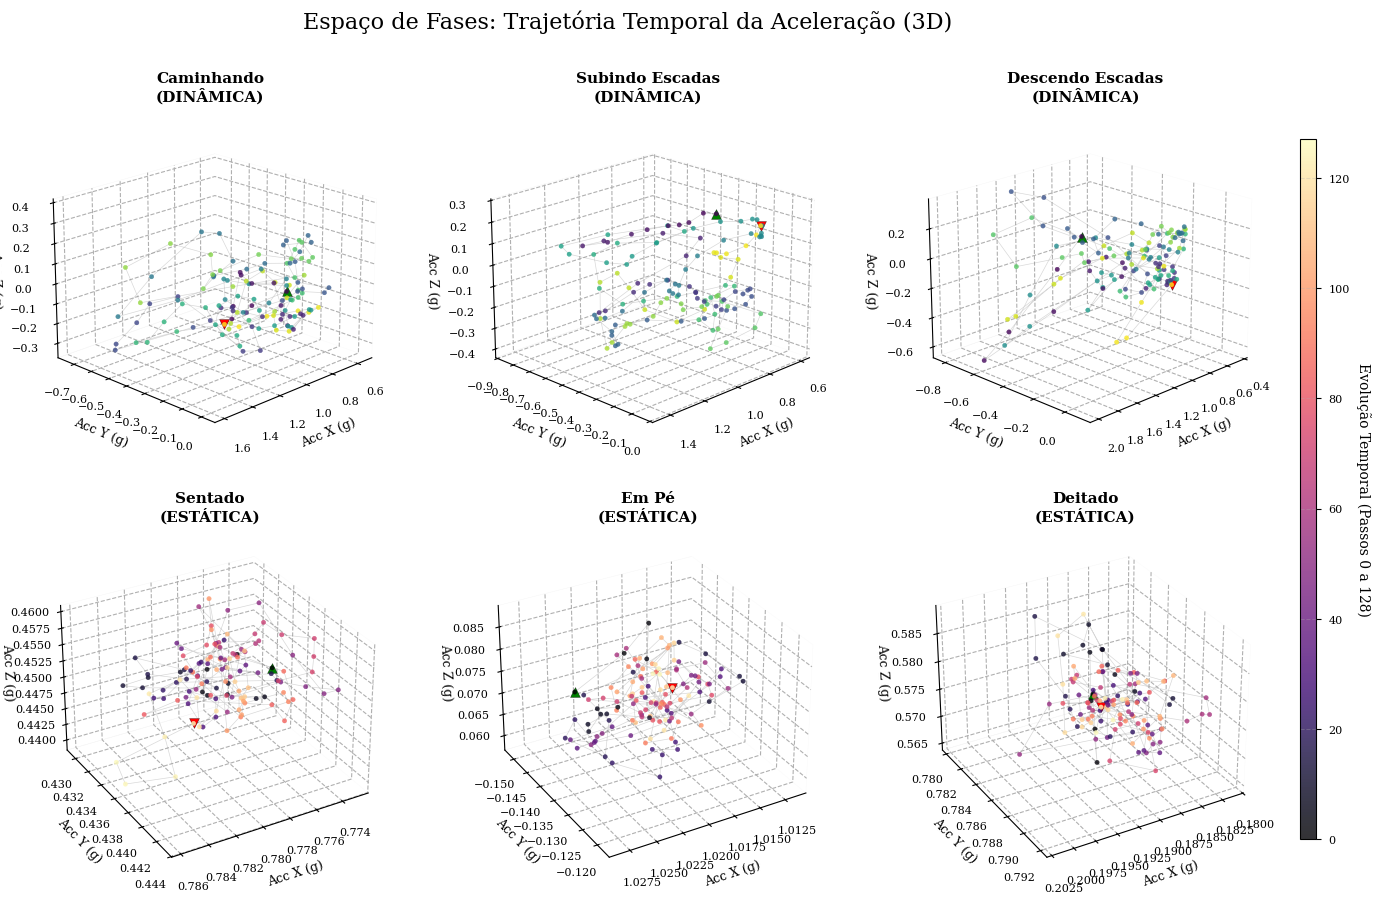

In [ ]:

# ==============================================================================
# VISUALIZAÇÃO PROFISSIONAL: TRAJETÓRIAS 3D COM GRADIENTE TEMPORAL
# ==============================================================================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plotar_painel_3d_profissional(nome_figura):
    """
    Gera painel 2x3.
    Melhoria: Usa cor gradiente para mostrar a evolução do tempo (0s -> 2.56s).
    Isso transforma o 'rabisco' em uma trajetória fluida.
    """
    fig = plt.figure(figsize=(16, 10))
    # Fundo branco para o paper (mais limpo que o cinza padrão)
    fig.patch.set_facecolor('white')

    atividades_ordem = [1, 2, 3, 4, 5, 6]
    titulos = ['Caminhando', 'Subindo Escadas', 'Descendo Escadas',
               'Sentado', 'Em Pé', 'Deitado']

    # Paletas de cores (Mapas de cor):
    # 'viridis' para dinâmicas (frio -> quente)
    # 'magma' para estáticas (escuro -> claro)
    cmaps = ['viridis', 'viridis', 'viridis', 'magma', 'magma', 'magma']

    for i, ativ_id in enumerate(atividades_ordem):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')

        # 1. Dados
        idx = np.where(y_treino == ativ_id)[0][10] # Peguei a 10ª amostra (às vezes a 0 é ruído)
        x = X_treino[idx, :, 6] # Total Acc X
        y = X_treino[idx, :, 7] # Total Acc Y
        z = X_treino[idx, :, 8] # Total Acc Z

        # 2. Criar Gradiente de Tempo (t = 0 a 128)
        # Usamos scatter para poder mudar a cor de cada ponto individualmente
        t = np.arange(len(x))

        # Plot da Linha (Fina e levemente transparente para guiar o olho)
        ax.plot(x, y, z, color='gray', linewidth=0.5, alpha=0.3)

        # Plot dos Pontos (Coloridos pelo tempo)
        img = ax.scatter(x, y, z, c=t, cmap=cmaps[i], s=10, alpha=0.8)

        # 3. Marcadores de Início (Verde) e Fim (Vermelho)
        # Ajuda a entender onde o movimento começa e termina
        ax.scatter(x[0], y[0], z[0], color='green', s=50, marker='^', label='Início', edgecolors='black')
        ax.scatter(x[-1], y[-1], z[-1], color='red', s=50, marker='v', label='Fim', edgecolors='black')

        # 4. Estética Profissional (Limpeza)
        nome_ativ = titulos[i]
        tipo = "DINÂMICA" if ativ_id <= 3 else "ESTÁTICA"

        ax.set_title(f'{nome_ativ}\n({tipo})', fontweight='bold', fontsize=11)
        ax.set_xlabel('Acc X (g)', fontsize=9)
        ax.set_ylabel('Acc Y (g)', fontsize=9)
        ax.set_zlabel('Acc Z (g)', fontsize=9)

        # Remover fundo cinza dos painéis (Melhor para impressão)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.grid(True, linestyle='--', alpha=0.3)

        # Ajuste de ângulo de visão para ver melhor a "nuvem"
        if ativ_id <= 3:
            ax.view_init(elev=20, azim=45) # Visão inclinada para dinâmicos
        else:
            ax.view_init(elev=30, azim=60) # Visão superior para estáticos

    # Barra de cores para explicar o tempo
    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7]) # Posição lateral
    cbar = fig.colorbar(img, cax=cbar_ax)
    cbar.set_label('Evolução Temporal (Passos 0 a 128)', rotation=270, labelpad=15)

    plt.suptitle('Espaço de Fases: Trajetória Temporal da Aceleração (3D)', fontsize=16, y=0.98)
    plt.savefig(f'figuras_artigo/{nome_figura}.png', dpi=300, bbox_inches='tight') # PNG Alta Resolução
    plt.show()

print(">>> Gerando Painel 3D Profissional...")
plotar_painel_3d_profissional('fig10_painel_3d_completo')

In [ ]:
# ==============================================================================
# 3.1 PREPARAÇÃO DOS DADOS (PRÉ-PROCESSAMENTO FINAL)
# ==============================================================================
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print(">>> Iniciando preparação para a Rede Neural...")

# 1. Ajuste dos Rótulos (Label Encoding -> One-Hot Encoding)
# O dataset original usa 1 a 6. O Python usa 0 a 5.
# Precisamos subtrair 1 antes de converter.
y_treino_ajustado = y_treino - 1
y_teste_ajustado = y_teste - 1

# Transformando em matriz binária (Ex: Classe 2 vira [0, 1, 0, 0, 0, 0])
# Isso é necessário porque a saída da rede será uma probabilidade para cada uma das 6 classes.
y_treino_onehot = to_categorical(y_treino_ajustado, num_classes=6)
y_teste_onehot = to_categorical(y_teste_ajustado, num_classes=6)

print(f"Shape original dos rótulos: {y_treino.shape}")
print(f"Novo shape (One-Hot): {y_treino_onehot.shape}")
# Deve imprimir (7352, 6)

# 2. Criação do Conjunto de Validação (Split)
# Separamos 20% do treino original para validar o modelo DURANTE o treinamento.
# Isso evita o Overfitting (quando o modelo decora o treino mas falha no mundo real).
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_treino, y_treino_onehot, test_size=0.2, random_state=42, stratify=y_treino_ajustado
)

print(f"Dados de Treino Efetivo: {X_train_final.shape}")
print(f"Dados de Validação: {X_val.shape}")

>>> Iniciando preparação para a Rede Neural...
Shape original dos rótulos: (7352, 1)
Novo shape (One-Hot): (7352, 6)
Dados de Treino Efetivo: (5881, 128, 9)
Dados de Validação: (1471, 128, 9)


In [ ]:
# ==============================================================================
# 3.2 ARQUITETURA DA REDE NEURAL (STACKED LSTM - EMPILHADA)
# ==============================================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def construir_modelo_lstm_competitivo(input_shape, num_classes):
    """
    Arquitetura 'Stacked LSTM' (LSTM Empilhada).
    Estratégia: Usar duas camadas LSTM em série para aprofundar a extração temporal
    sem precisar de bidirecionalidade ou convolução.
    """
    model = Sequential()

    # --- CAMADA 1: LSTM (Extração de Padrões Brutos) ---
    # return_sequences=True: O PULO DO GATO.
    # Em vez de resumir tudo agora, ela passa o "filme" processado para a próxima camada.
    model.add(LSTM(units=128,
                   input_shape=input_shape,
                   return_sequences=True,  # Mantém a temporalidade para a próxima LSTM
                   kernel_initializer='he_normal'))
    model.add(Dropout(0.3)) # Aumentei um pouco para evitar overfitting na rede mais profunda

    # --- CAMADA 2: LSTM (Refinamento Temporal) ---
    # Recebe a sequência da anterior e agora sim resume para um vetor final.
    model.add(LSTM(units=64,
                   return_sequences=False, # Aqui compactamos para a classificação
                   kernel_initializer='he_normal'))
    model.add(Dropout(0.3))

    # --- CAMADA 3: DENSE (Classificação) ---
    # BatchNormalization ajuda a rede a não "estourar" os pesos e treinar mais estável
    model.add(BatchNormalization())

    # Mudei para 'relu' (padrão moderno) em vez de 'tanh' na densa, costuma convergir melhor
    model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.2))

    # --- CAMADA 4: SAÍDA (Output) ---
    model.add(Dense(units=num_classes, activation='softmax'))

    # Compilação
    # Usamos uma taxa de aprendizado inicial padrão (0.001) que será ajustada pelo Callback
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Instanciando o modelo
modelo = construir_modelo_lstm_competitivo((128, 9), 6)

print("--- Resumo do Modelo 'Stacked LSTM' Proposto ---")
modelo.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Resumo do Modelo 'Stacked LSTM' Proposto ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128, 128)       │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,870 (487.77 KB)

 Trainable params: 124,742 (487.27 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# ==============================================================================
# 3.3 TREINAMENTO COM AJUSTE FINO (LROnPlateau)
# ==============================================================================
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("\n>>> Iniciando o Treinamento Otimizado...")

# 1. Early Stopping: Para se o modelo parar de melhorar geral
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=12,               # Espera um pouco mais antes de desistir
    restore_best_weights=True,
    verbose=1,
    mode='min'
)

# 2. ReduceLROnPlateau: O SEGREDO DA COMPETITIVIDADE
# Quando o erro para de cair, ele diminui a velocidade de aprendizado (learning rate).
# Isso permite que a rede faça o "ajuste fino" para separar classes difíceis (Sentado vs Em pé).
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,       # Reduz para 20% da velocidade atual
    patience=4,       # Se o erro não cair por 4 épocas, reduz a velocidade
    min_lr=0.00001,   # Limite mínimo de velocidade
    verbose=1
)

history = modelo.fit(
    X_train_final, y_train_final,
    epochs=60,                      # Damos mais épocas pois o reduce_lr precisa de tempo para agir
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr], # Adicionamos o redutor aqui
    verbose=1
)

print(">>> Treinamento concluído!")


>>> Iniciando o Treinamento Otimizado...
Epoch 1/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 394ms/step - accuracy: 0.5544 - loss: 1.1713 - val_accuracy: 0.8770 - val_loss: 0.5052 - learning_rate: 0.0010
Epoch 2/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.8522 - loss: 0.4037 - val_accuracy: 0.9028 - val_loss: 0.2994 - learning_rate: 0.0010
Epoch 3/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 0.8782 - loss: 0.3467 - val_accuracy: 0.9150 - val_loss: 0.2146 - learning_rate: 0.0010
Epoch 4/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 0.9083 - loss: 0.2617 - val_accuracy: 0.8912 - val_loss: 0.3504 - learning_rate: 0.0010
Epoch 5/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 401ms/step - accuracy: 0.9281 - loss: 0.2122 - val_accuracy: 0.9443 - val_loss: 0.1313 - learning_rate: 0.0010
Epoch 6/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - accuracy: 0.9463 - loss: 0.1460 - val_accuracy: 0.9483 - val_loss: 0.1359 - learning_rate: 0.0010
Epoch 7/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 37

In [ ]:
# ==============================================================================
# 3. MODELAGEM ALTERNATIVA: PURE 1D-CNN (SEM LSTM)
# ==============================================================================
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten

def construir_modelo_so_cnn(input_shape, num_classes):
    model = Sequential()

    # --- BLOCO 1: Extração de Padrões Básicos ---
    # 64 filtros varrendo o sinal
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization()) # Ajuda a estabilizar a CNN
    model.add(MaxPooling1D(pool_size=2)) # Reduz o tamanho pela metade (foca no mais importante)

    # --- BLOCO 2: Padrões Complexos ---
    # Aumentamos para 128 filtros para captar combinações de movimentos
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # --- BLOCO 3: Profundidade (Opcional, mas bom para alta precisão) ---
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # --- TRANSFORMAÇÃO PARA CLASSIFICAÇÃO ---
    # Aqui está o segredo das CNNs modernas: GlobalAveragePooling1D
    # Em vez de 'Flatten' (que gera milhares de pesos), ele tira a média de cada filtro.
    # Isso evita overfitting brutalmente.
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))

    # --- SAÍDA ---
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    # Compilação
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Instanciar
print(">>> Construindo Modelo PURE CNN...")
modelo_cnn = construir_modelo_so_cnn((128, 9), 6)
modelo_cnn.summary()

# Callbacks (Mesmos)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
]

# Treinamento
print(">>> Iniciando Treinamento CNN Pura...")
history_cnn = modelo_cnn.fit(
    X_train_final,
    y_train_final,
    epochs=200, # CNNs aguentam mais épocas por serem rápidas
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

>>> Construindo Modelo PURE CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 126, 64)        │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 126, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 61, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 28, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 14, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,686 (561.27 KB)

 Trainable params: 142,790 (557.77 KB)

 Non-trainable params: 896 (3.50 KB)

>>> Iniciando Treinamento CNN Pura...
Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.7502 - loss: 0.7012 - val_accuracy: 0.2542 - val_loss: 1.7401 - learning_rate: 0.0010
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9321 - loss: 0.1693 - val_accuracy: 0.4555 - val_loss: 2.0351 - learning_rate: 0.0010
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9345 - loss: 0.1516 - val_accuracy: 0.6030 - val_loss: 1.2038 - learning_rate: 0.0010
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9380 - loss: 0.1396 - val_accuracy: 0.8634 - val_loss: 0.3867 - learning_rate: 0.0010
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9518 - loss: 0.1214 - val_accuracy: 0.9531 - val_loss: 0.1288 - learning_rate: 0.0010
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9420 - loss: 0.1339 - val_accuracy: 0.9633 - val_loss: 0.1011 - learning_rate: 0.0010
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/s

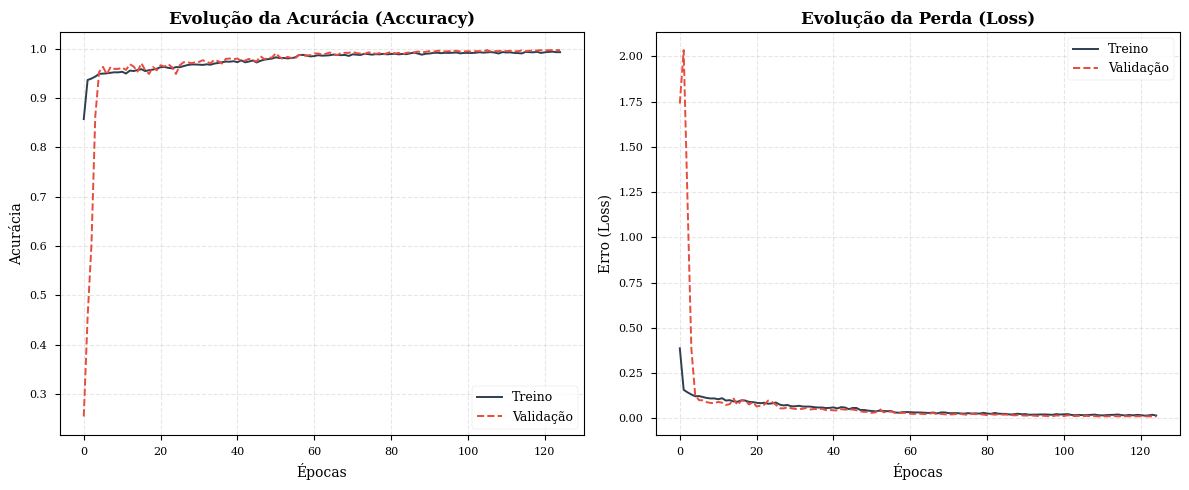

In [ ]:
# ==============================================================================
# 3.4 GRÁFICOS DE DESEMPENHO (PERDA E ACURÁCIA)
# ==============================================================================

def plotar_historico_treino(history, nome_figura):
    """Plota as curvas de aprendizado para inclusão no artigo."""
    plt.figure(figsize=(12, 5))

    # --- Gráfico 1: Acurácia ---
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino', color='#2c3e50')
    plt.plot(history.history['val_accuracy'], label='Validação', color='#e74c3c', linestyle='--')
    plt.title('Evolução da Acurácia (Accuracy)', fontweight='bold')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- Gráfico 2: Perda (Loss) ---
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino', color='#2c3e50')
    plt.plot(history.history['val_loss'], label='Validação', color='#e74c3c', linestyle='--')
    plt.title('Evolução da Perda (Loss)', fontweight='bold')
    plt.xlabel('Épocas')
    plt.ylabel('Erro (Loss)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'figuras_artigo/{nome_figura}.pdf')
    plt.show()

plotar_historico_treino(history_cnn, 'fig11_curvas_aprendizado_cnn')

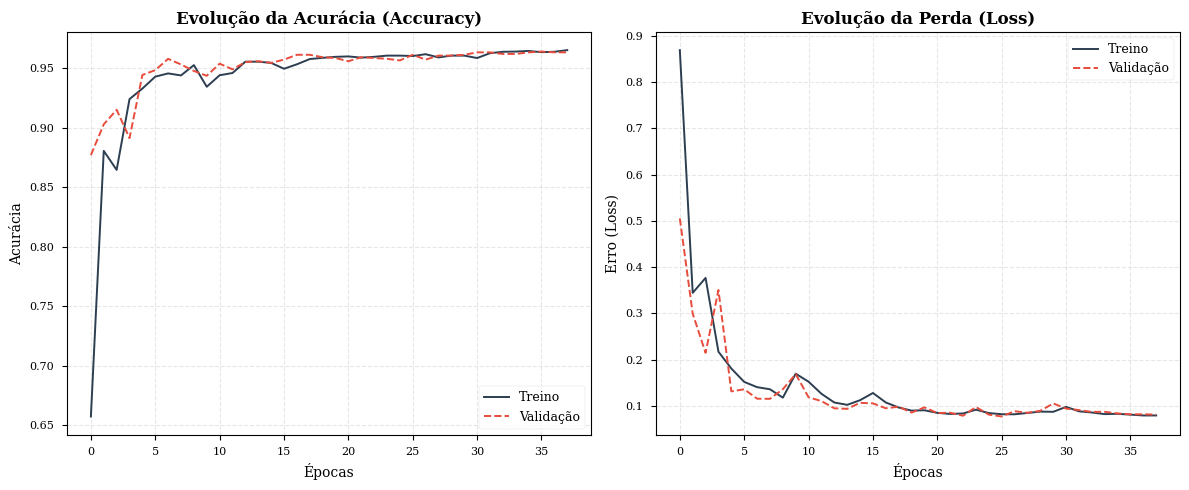

In [ ]:
# ==============================================================================
# 3.4 GRÁFICOS DE DESEMPENHO (PERDA E ACURÁCIA)
# ==============================================================================

def plotar_historico_treino(history, nome_figura):
    """Plota as curvas de aprendizado para inclusão no artigo."""
    plt.figure(figsize=(12, 5))

    # --- Gráfico 1: Acurácia ---
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino', color='#2c3e50')
    plt.plot(history.history['val_accuracy'], label='Validação', color='#e74c3c', linestyle='--')
    plt.title('Evolução da Acurácia (Accuracy)', fontweight='bold')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- Gráfico 2: Perda (Loss) ---
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino', color='#2c3e50')
    plt.plot(history.history['val_loss'], label='Validação', color='#e74c3c', linestyle='--')
    plt.title('Evolução da Perda (Loss)', fontweight='bold')
    plt.xlabel('Épocas')
    plt.ylabel('Erro (Loss)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'figuras_artigo/{nome_figura}.pdf')
    plt.show()

plotar_historico_treino(history, 'fig11_curvas_aprendizado_lstm')

>>> Realizando previsões no Conjunto de Teste...
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
>>> Gerando Matriz de Confusão...


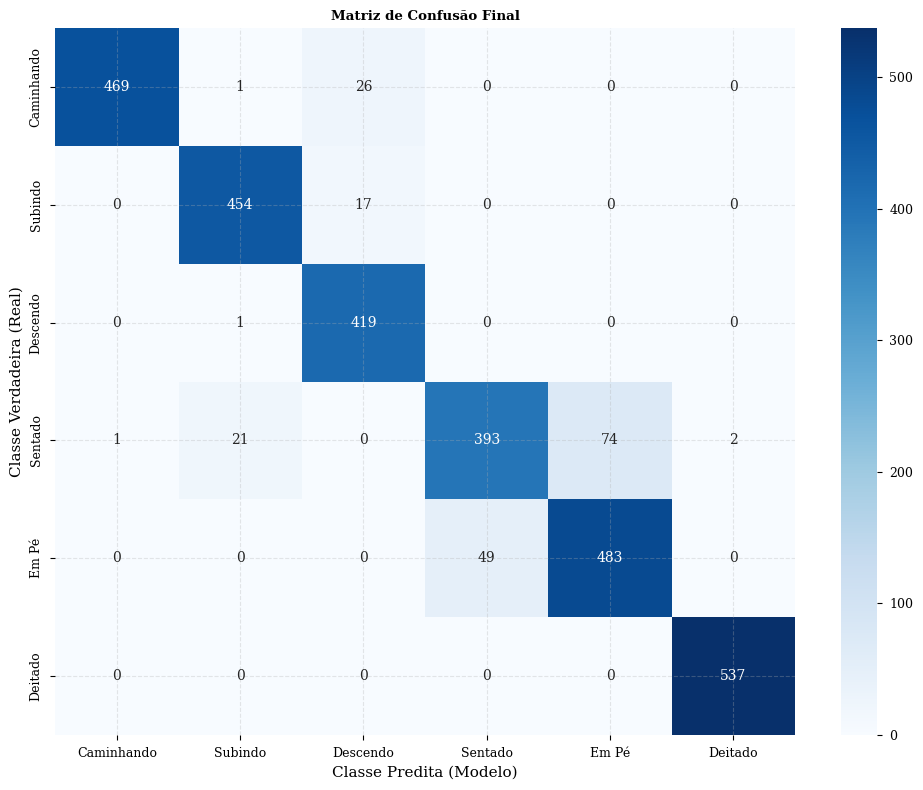


--- Relatório Detalhado de Métricas ---
              precision    recall  f1-score   support

  Caminhando       1.00      0.95      0.97       496
     Subindo       0.95      0.96      0.96       471
    Descendo       0.91      1.00      0.95       420
     Sentado       0.89      0.80      0.84       491
       Em Pé       0.87      0.91      0.89       532
     Deitado       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.94      0.93      2947
weighted avg       0.94      0.93      0.93      2947



In [ ]:
# ==============================================================================
# 4. AVALIAÇÃO DO MODELO NO CONJUNTO DE TESTE (CORRIGIDO)
# ==============================================================================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(">>> Realizando previsões no Conjunto de Teste...")

# 1. Previsão
previsoes = modelo_cnn.predict(X_teste)
y_pred_cnn = np.argmax(previsoes, axis=1)

# 2. Gabarito (Garante que seja um array 1D de inteiros: 0, 1, 2...)
y_real_cnn = y_teste_ajustado.ravel()

# 3. Definição da Ordem Correta (Fundamental!)
# 0: Walking, 1: Upstairs, 2: Downstairs, 3: Sitting, 4: Standing, 5: Laying
nomes_classes = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']

# ==============================================================================
# 4.1 MATRIZ DE CONFUSÃO
# ==============================================================================
def plotar_matriz_final(y_true, y_pred, labels, nome_arquivo):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    # Heatmap com contagem e cores
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.title('Matriz de Confusão Final', fontweight='bold')
    plt.ylabel('Classe Verdadeira (Real)')
    plt.xlabel('Classe Predita (Modelo)')
    plt.tight_layout()

    # Salvar como PNG (Mais seguro para o relatório)
    plt.savefig(f'figuras_artigo/{nome_arquivo}.png', dpi=300)
    plt.show()

print(">>> Gerando Matriz de Confusão...")
plotar_matriz_final(y_real_cnn, y_pred_cnn, nomes_classes, 'fig12_matriz_confusao_cnn')

# ==============================================================================
# 4.2 RELATÓRIO DE CLASSIFICAÇÃO
# ==============================================================================
print("\n--- Relatório Detalhado de Métricas ---")
# O target_names garante que o relatório use os nomes na ordem certa dos índices 0..5
relatorio = classification_report(y_real_cnn, y_pred_cnn, target_names=nomes_classes)
print(relatorio)

# Salvar
with open('figuras_artigo/tabela_resultados_finais.txt', 'w') as f:
    f.write(relatorio)

>>> Realizando previsões no Conjunto de Teste...
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step
>>> Gerando Matriz de Confusão...


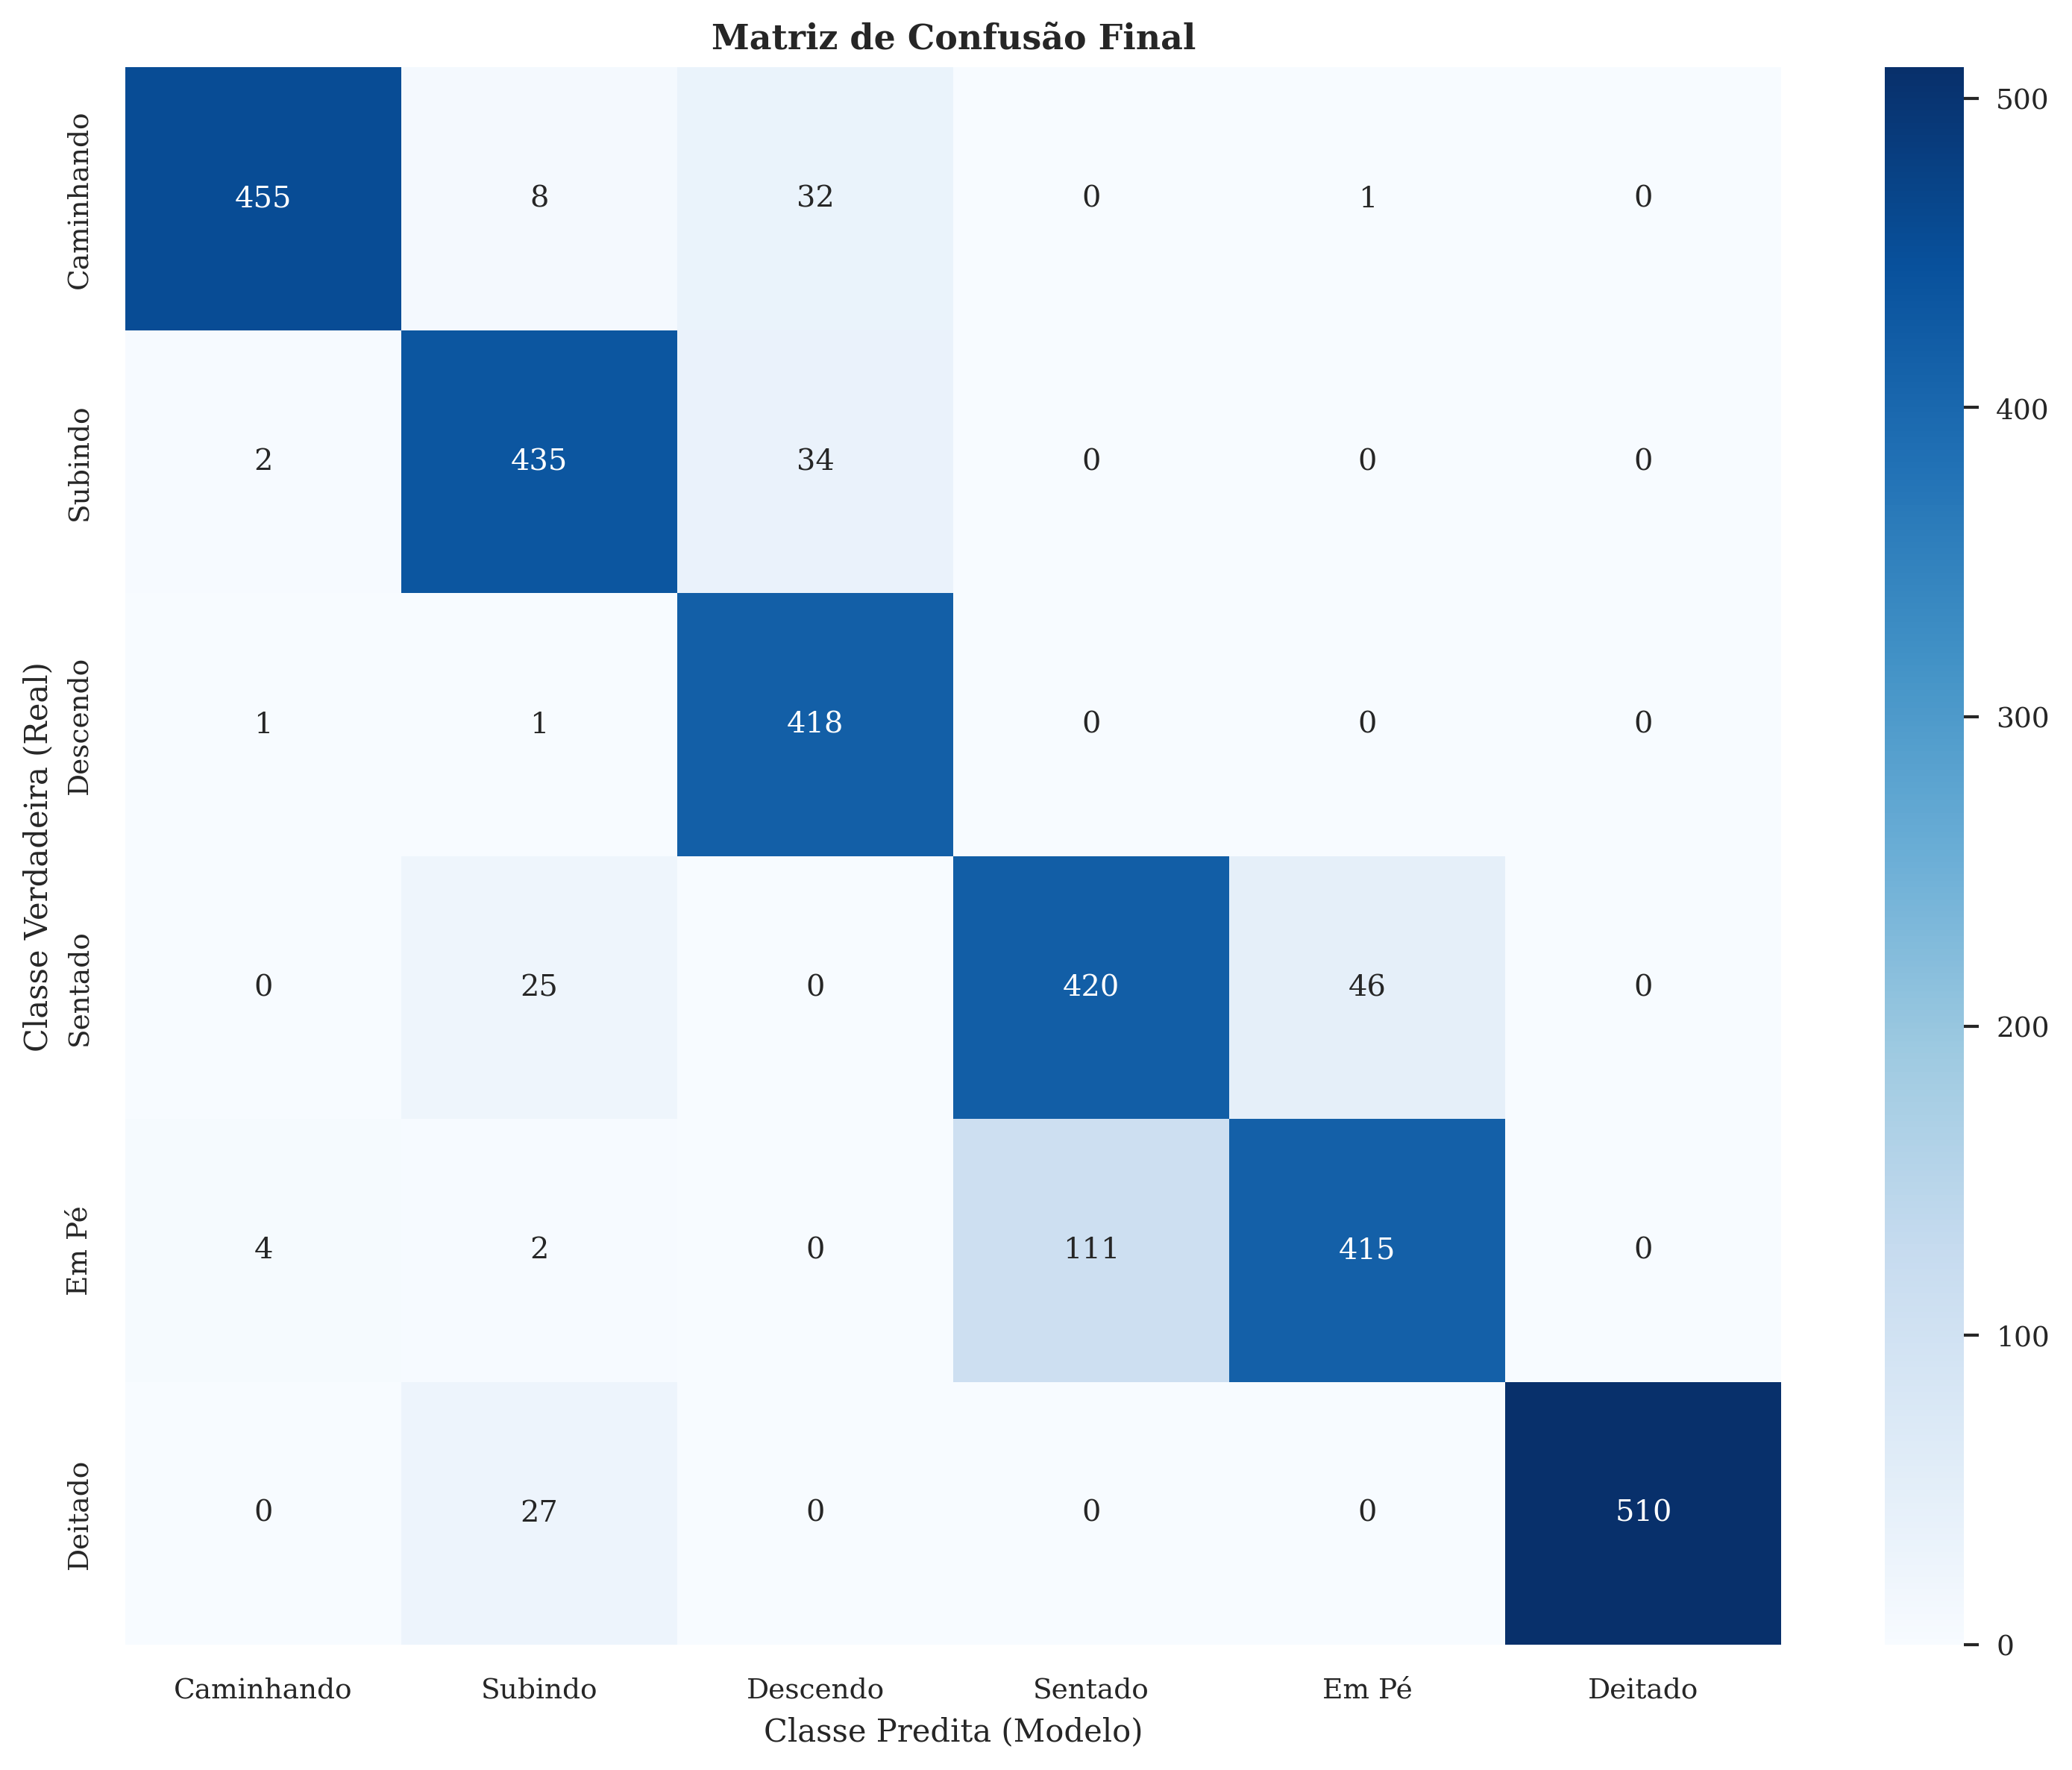


--- Relatório Detalhado de Métricas ---
              precision    recall  f1-score   support

  Caminhando       0.98      0.92      0.95       496
     Subindo       0.87      0.92      0.90       471
    Descendo       0.86      1.00      0.92       420
     Sentado       0.79      0.86      0.82       491
       Em Pé       0.90      0.78      0.84       532
     Deitado       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



In [61]:
# ==============================================================================
# 4. AVALIAÇÃO DO MODELO NO CONJUNTO DE TESTE (CORRIGIDO)
# ==============================================================================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(">>> Realizando previsões no Conjunto de Teste...")

# 1. Previsão
previsoes = modelo.predict(X_teste)
y_pred = np.argmax(previsoes, axis=1)

# 2. Gabarito (Garante que seja um array 1D de inteiros: 0, 1, 2...)
y_real = y_teste_ajustado.ravel()

# 3. Definição da Ordem Correta (Fundamental!)
# 0: Walking, 1: Upstairs, 2: Downstairs, 3: Sitting, 4: Standing, 5: Laying
nomes_classes = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']

# ==============================================================================
# 4.1 MATRIZ DE CONFUSÃO
# ==============================================================================
def plotar_matriz_final(y_true, y_pred, labels, nome_arquivo):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    # Heatmap com contagem e cores
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.title('Matriz de Confusão Final', fontweight='bold')
    plt.ylabel('Classe Verdadeira (Real)')
    plt.xlabel('Classe Predita (Modelo)')
    plt.tight_layout()

    # Salvar como PNG (Mais seguro para o relatório)
    plt.savefig(f'figuras_artigo/{nome_arquivo}.png', dpi=300)
    plt.show()

print(">>> Gerando Matriz de Confusão...")
plotar_matriz_final(y_real, y_pred, nomes_classes, 'fig12_matriz_confusao_lstm')

# ==============================================================================
# 4.2 RELATÓRIO DE CLASSIFICAÇÃO
# ==============================================================================
print("\n--- Relatório Detalhado de Métricas ---")
# O target_names garante que o relatório use os nomes na ordem certa dos índices 0..5
relatorio = classification_report(y_real, y_pred, target_names=nomes_classes)
print(relatorio)

# Salvar
with open('figuras_artigo/tabela_resultados_finais.txt', 'w') as f:
    f.write(relatorio)

In [ ]:
# ==============================================================================
# VERIFICAÇÃO DE INTEGRIDADE DOS RÓTULOS (SANITY CHECK)
# ==============================================================================
print(">>> Verificando integridade das classes...")
# Sabemos que 'Deitado' (Laying) tem o eixo X da aceleração muito estável e diferente de zero (gravidade)
# E 'Caminhando' tem alta variância.

# Pegamos uma amostra que é classificada como 0 (Caminhando no seu código)
idx_0 = np.where(y_teste_ajustado == 0)[0][0]
std_0 = np.std(X_teste[idx_0, :, 0]) # Desvio padrão do Acc X

# Pegamos uma amostra que é classificada como 5 (Deitado no seu código)
idx_5 = np.where(y_teste_ajustado == 5)[0][0]
std_5 = np.std(X_teste[idx_5, :, 0]) # Desvio padrão do Acc X

print(f"Classe 0 (Caminhando) - Desvio Padrão: {std_0:.4f} (Deve ser ALTO, > 0.2)")
print(f"Classe 5 (Deitado)    - Desvio Padrão: {std_5:.4f} (Deve ser BAIXO, < 0.05)")

nomes_corretos = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']
print(f"Sua lista de nomes: {nomes_corretos}")

if std_0 > std_5:
    print(">>> OK: A ordem física parece correta.")
else:
    print(">>> PERIGO: Os rótulos parecem estar trocados! Verifique a ordem.")

>>> Verificando integridade das classes...
Classe 0 (Caminhando) - Desvio Padrão: 0.1744 (Deve ser ALTO, > 0.2)
Classe 5 (Deitado)    - Desvio Padrão: 0.0358 (Deve ser BAIXO, < 0.05)
Sua lista de nomes: ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']
>>> OK: A ordem física parece correta.


In [ ]:
# # Apaga tudo dentro da pasta padrão (/content/)
# # O comando 'rm -rf' força a remoção de arquivos e pastas recursivamente
# !rm -rf /content/*

>>> Gerando Painel de Desempenho Profissional...


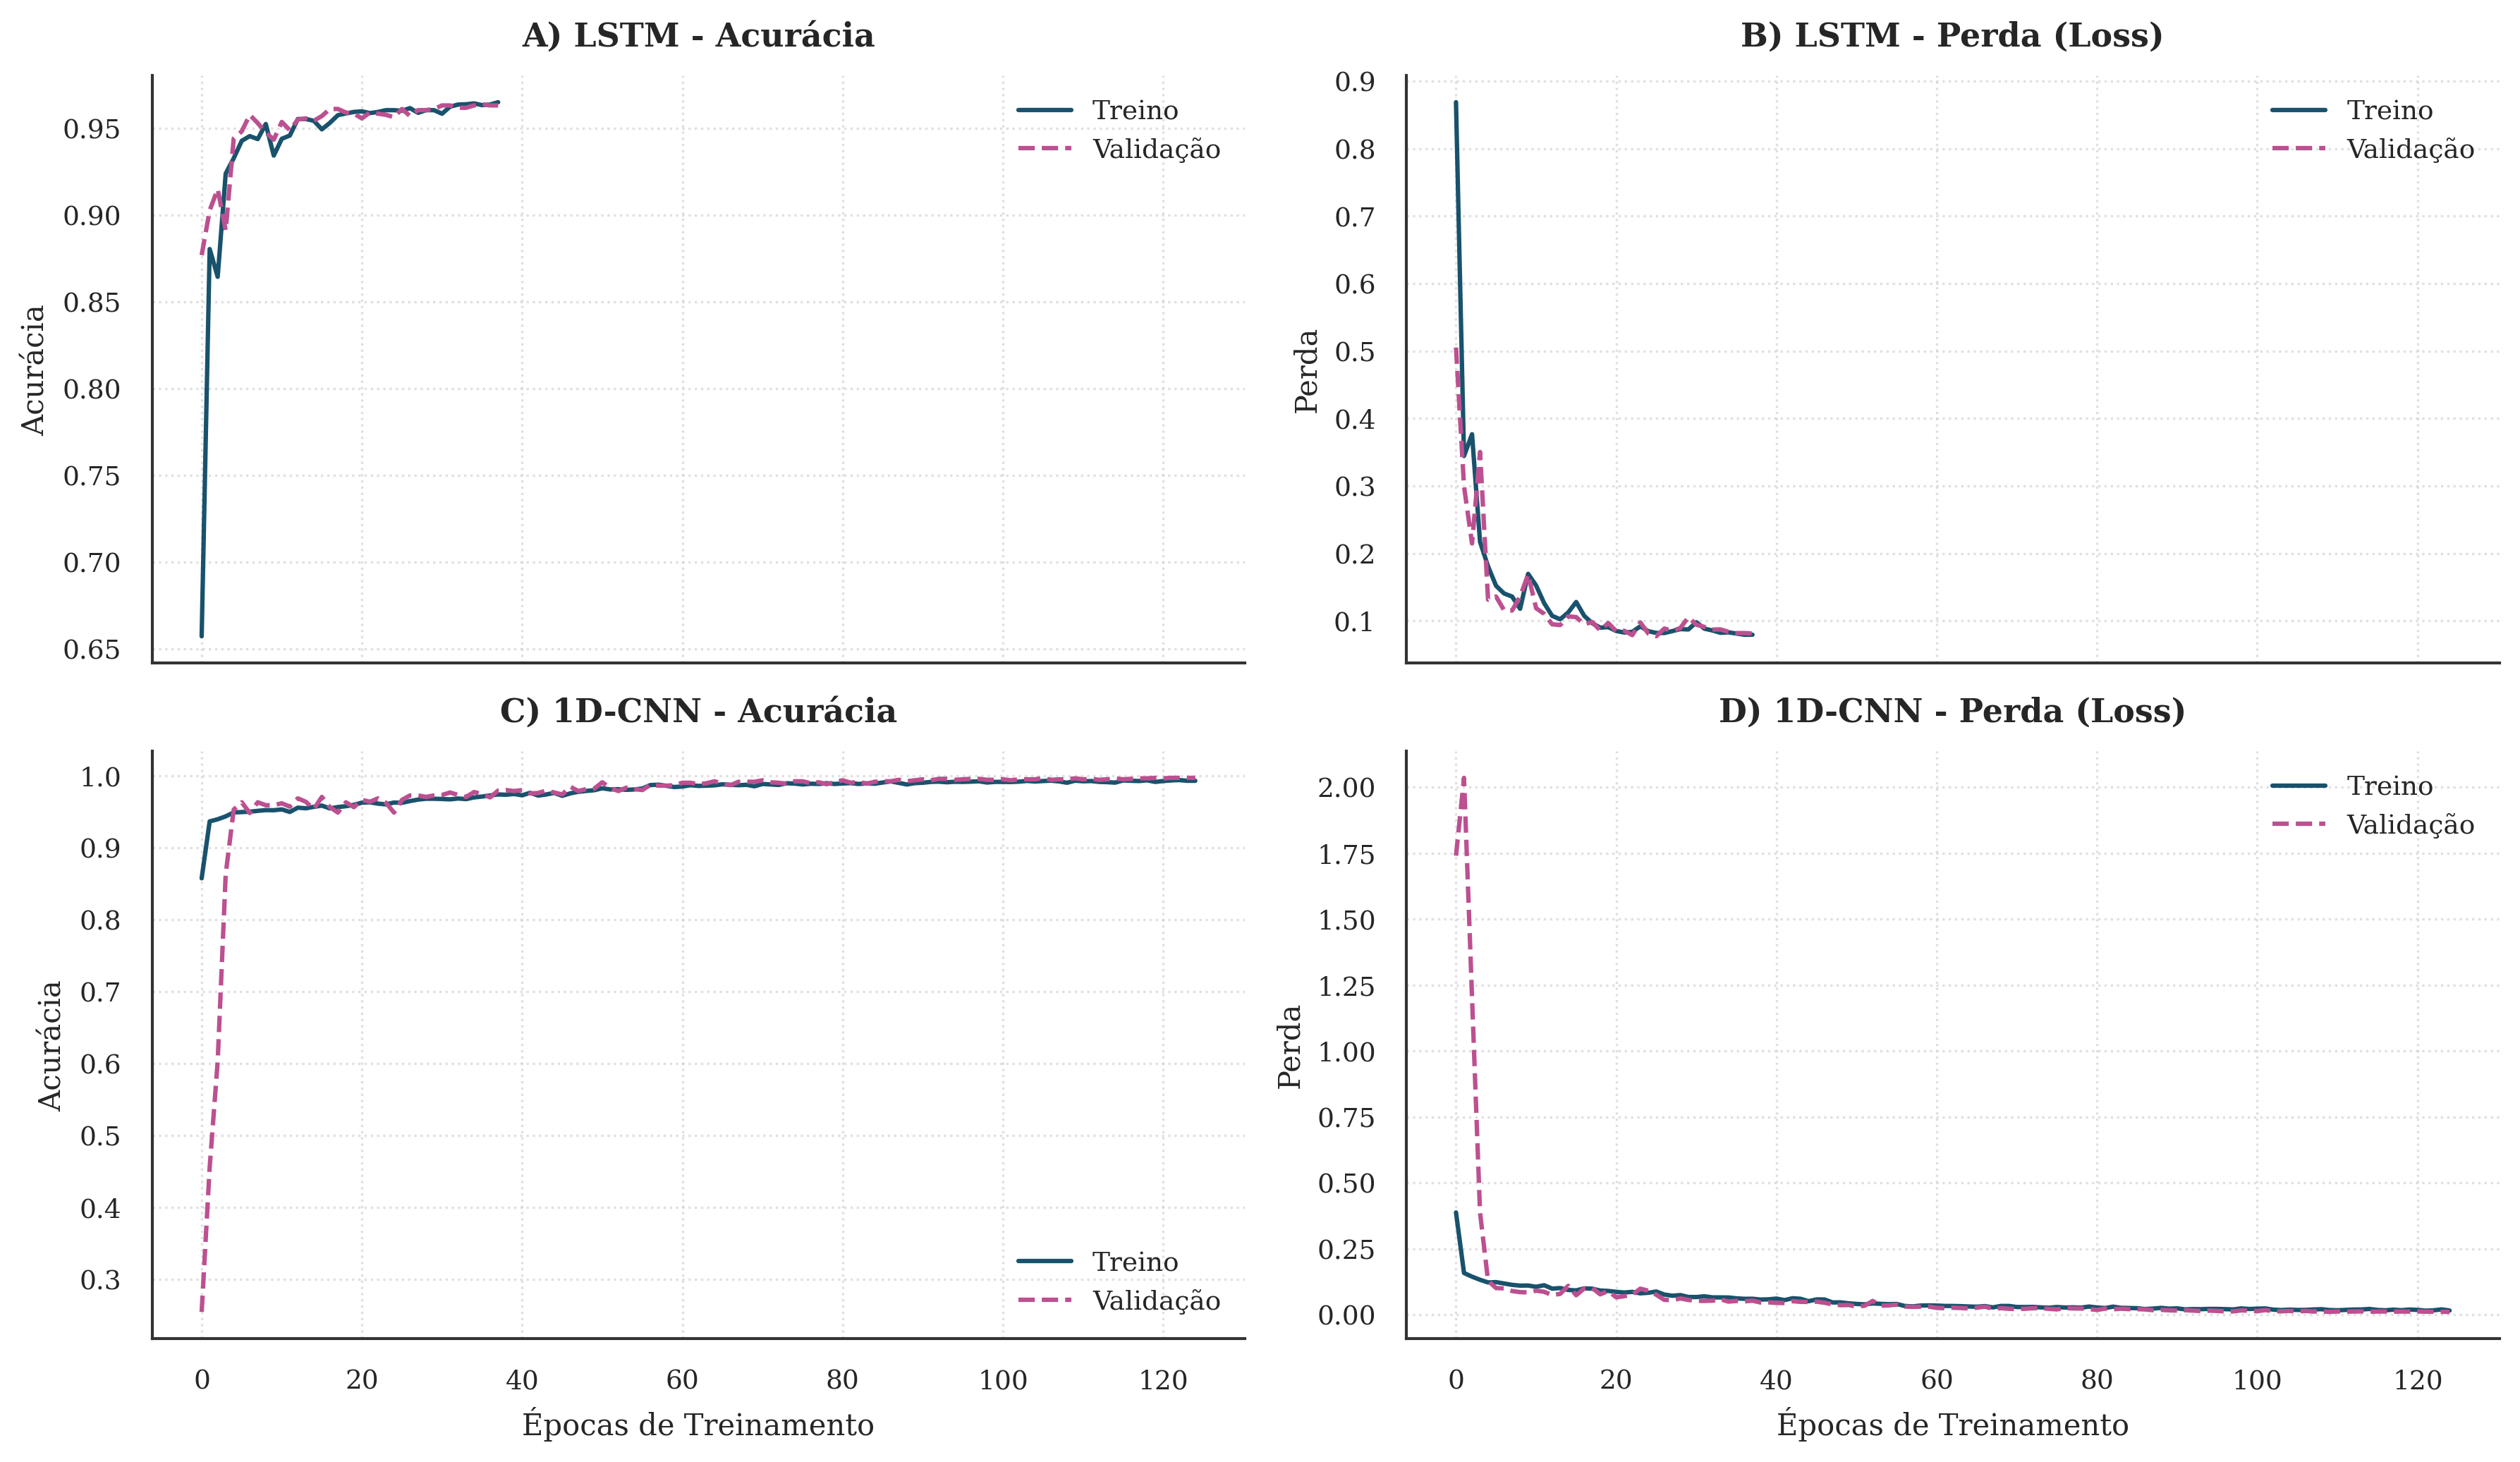

>>> Sucesso! Gráfico salvo em 'figuras_artigo/fig_desempenho_completo.png'


In [60]:
# ==============================================================================
# SCRIPT DE VISUALIZAÇÃO PROFISSIONAL (ACADEMIC STYLE)
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Configuração Estética "Paper-Ready"
# Removemos o fundo cinza do Seaborn e usamos 'whitegrid' para limpeza
sns.set_theme(style="whitegrid", context="paper")

plt.rcParams.update({
    'font.family': 'serif',          # Fonte Serifada (combina com LaTeX)
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'Liberation Serif'],
    'axes.labelsize': 10,            # Rótulos dos eixos legíveis
    'axes.titlesize': 11,            # Títulos internos sutis
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.edgecolor': '#333333',     # Bordas dos eixos mais suaves
    'grid.alpha': 0.3,               # Grid discreto
    'grid.linestyle': '--',
    'figure.dpi': 300                # Alta resolução
})

if not os.path.exists('figuras_artigo'):
    os.makedirs('figuras_artigo')

# ==============================================================================
# FUNÇÃO: PAINEL DE DESEMPENHO 2x2 (ACC + LOSS)
# Arquivo: fig_desempenho_completo.pdf
# ==============================================================================
def gerar_painel_desempenho(hist_lstm, hist_cnn):
    print(">>> Gerando Painel de Desempenho Profissional...")

    # Criar figura 2x2
    fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)

    # Definição de Cores Profissionais
    # Azul Escuro (Treino) e Vermelho Queimado (Validação)
    c_train = '#003f5c'
    c_val = '#bc5090'

    # --- HELPER PARA PLOTAR CURVAS ---
    def plot_curve(ax, history, metric, title, y_label):
        # Treino (Linha Sólida)
        ax.plot(history.history[metric], label='Treino',
                color=c_train, linewidth=1.5, alpha=0.9)
        # Validação (Linha Tracejada - melhor para impressão P&B)
        ax.plot(history.history[f'val_{metric}'], label='Validação',
                color=c_val, linewidth=1.5, linestyle='--')

        # Estética
        ax.set_title(title, fontweight='bold', pad=10)
        ax.set_ylabel(y_label)
        ax.grid(True, linestyle=':', alpha=0.6)

        # Legenda limpa (sem caixa)
        ax.legend(frameon=False, loc='best')

        # Remove bordas desnecessárias (topo e direita)
        sns.despine(ax=ax)

    # --- LINHA 1: LSTM ---
    plot_curve(axes[0,0], hist_lstm, 'accuracy', 'A) LSTM - Acurácia', 'Acurácia')
    plot_curve(axes[0,1], hist_lstm, 'loss',     'B) LSTM - Perda (Loss)', 'Perda')

    # --- LINHA 2: CNN ---
    plot_curve(axes[1,0], hist_cnn, 'accuracy',  'C) 1D-CNN - Acurácia', 'Acurácia')
    plot_curve(axes[1,1], hist_cnn, 'loss',      'D) 1D-CNN - Perda (Loss)', 'Perda')

    # Ajuste do Eixo X (apenas na linha de baixo)
    axes[1,0].set_xlabel('Épocas de Treinamento')
    axes[1,1].set_xlabel('Épocas de Treinamento')

    plt.tight_layout()
    # Salvar em PDF (Vetorial)
    plt.savefig('figuras_artigo/fig_desempenho_completo.png', bbox_inches='tight')
    plt.show()

# ==============================================================================
# EXECUÇÃO
# ==============================================================================
try:
    gerar_painel_desempenho(history, history_cnn)
    print(">>> Sucesso! Gráfico salvo em 'figuras_artigo/fig_desempenho_completo.png'")
except NameError:
    print(">>> Erro: Certifique-se de que 'history' (LSTM) e 'history_cnn' (CNN) estão na memória.")

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Garante que a pasta existe
if not os.path.exists('figuras_artigo'):
    os.makedirs('figuras_artigo')

def gerar_esquema_smartphone():
    fig, ax = plt.subplots(figsize=(6, 6))

    # Desenhar o "Smartphone" (Retângulo)
    # x, y, width, height
    phone = patches.FancyBboxPatch((0.3, 0.2), 0.4, 0.6,
                                   boxstyle="round,pad=0.02",
                                   ec="#333", fc="#eee", lw=2)
    ax.add_patch(phone)

    # Configurar limites
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off') # Esconder eixos do plot

    # Centro do telefone
    cx, cy = 0.5, 0.5

    # Desenhar Setas dos Eixos (X, Y, Z)
    style = "Simple, tail_width=2, head_width=8, head_length=8"
    kw = dict(arrowstyle=style, color="k")

    # Eixo X (Vermelho - Lateral)
    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx + 0.3, cy),
                                         arrowstyle=style, color="#e74c3c", label='X'))
    ax.text(cx + 0.32, cy, "X (Lateral)", color="#e74c3c", fontsize=12, fontweight='bold', va='center')

    # Eixo Y (Verde - Vertical)
    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx, cy + 0.35),
                                         arrowstyle=style, color="#2ecc71", label='Y'))
    ax.text(cx, cy + 0.37, "Y (Vertical)", color="#2ecc71", fontsize=12, fontweight='bold', ha='center')

    # Eixo Z (Azul - Profundidade/Saindo da tela)
    # Representado na diagonal
    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx + 0.15, cy - 0.15),
                                         arrowstyle=style, color="#3498db", label='Z'))
    ax.text(cx + 0.16, cy - 0.17, "Z (Profundidade)", color="#3498db", fontsize=12, fontweight='bold')

    # Título interno
    ax.text(0.5, 0.9, "Eixos do Acelerômetro", ha='center', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('figuras_artigo/fig_smartphone_axis.png', dpi=300, bbox_inches='tight')
    print(">>> Figura 'fig_smartphone_axis.png' gerada com sucesso!")
    plt.close()

# Executar
gerar_esquema_smartphone()

>>> Figura 'fig_smartphone_axis.png' gerada com sucesso!


In [66]:
# ==============================================================================
# SCRIPT FINAL: GERAÇÃO DE FIGURAS EM PNG (COMPATÍVEL COM QUARTO/HTML)
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix

# 1. Configuração de Estilo (Alta Resolução para Slides)
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.dpi': 300,        # Alta qualidade para o PNG
    'savefig.dpi': 300,       # Garante que o arquivo salvo seja nítido
    'figure.autolayout': True
})

# Pasta de saída
if not os.path.exists('figuras_artigo'):
    os.makedirs('figuras_artigo')

# Labels
nomes_classes = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']

# ==============================================================================
# 1. ESQUEMA DO SMARTPHONE (EIXOS)
# Arquivo: fig_smartphone_axis.png
# ==============================================================================
def gerar_esquema_smartphone():
    print(">>> Gerando Fig 1: Esquema do Smartphone...")
    fig, ax = plt.subplots(figsize=(6, 6))

    # Desenho do Celular
    phone = patches.FancyBboxPatch((0.3, 0.2), 0.4, 0.6,
                                   boxstyle="round,pad=0.02",
                                   ec="#333", fc="#f0f0f0", lw=2)
    ax.add_patch(phone)
    ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.axis('off')

    cx, cy = 0.5, 0.5
    style = "Simple, tail_width=2, head_width=8, head_length=8"

    # Eixos
    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx + 0.3, cy), arrowstyle=style, color="#e74c3c"))
    ax.text(cx + 0.32, cy, "X (Lateral)", color="#e74c3c", fontweight='bold')

    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx, cy + 0.35), arrowstyle=style, color="#2ecc71"))
    ax.text(cx, cy + 0.37, "Y (Vertical)", color="#2ecc71", fontweight='bold', ha='center')

    ax.add_patch(patches.FancyArrowPatch((cx, cy), (cx + 0.15, cy - 0.15), arrowstyle=style, color="#3498db"))
    ax.text(cx + 0.16, cy - 0.17, "Z (Profundidade)", color="#3498db", fontweight='bold')

    plt.savefig('figuras_artigo/fig_smartphone_axis.png', bbox_inches='tight')
    plt.close()

# ==============================================================================
# 2. BALANCEAMENTO DAS CLASSES
# Arquivo: fig_balanceamento.png
# ==============================================================================
def gerar_balanceamento(y_dados):
    print(">>> Gerando Fig 2: Balanceamento...")
    df = pd.DataFrame(y_dados, columns=['id'])
    rotulos = {1:'Caminhando', 2:'Subindo', 3:'Descendo', 4:'Sentado', 5:'Em Pé', 6:'Deitado'}
    df['Atividade'] = df['id'].map(rotulos)

    plt.figure(figsize=(8, 5))
    sns.countplot(y='Atividade', data=df, palette='ch:s=.25,rot=-.25', hue='Atividade', legend=False)
    plt.xlabel('Número de Amostras')
    plt.ylabel('')
    plt.savefig('figuras_artigo/fig_balanceamento.png', bbox_inches='tight')
    plt.close()

# ==============================================================================
# 3. PAINEL 3D (TRAJETÓRIAS)
# Arquivo: fig10_painel_3d_completo.png
# ==============================================================================
def gerar_painel_3d(X, y):
    print(">>> Gerando Fig 3: Painel 3D...")
    fig = plt.figure(figsize=(14, 8))
    fig.patch.set_facecolor('white')

    atividades_idx = [1, 2, 3, 4, 5, 6]
    nomes = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']

    for i, ativ_id in enumerate(atividades_idx):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        indices = np.where(y == ativ_id)[0]
        idx = indices[10] if len(indices) > 10 else indices[0] # Amostra representativa

        x_val = X[idx, :, 6]; y_val = X[idx, :, 7]; z_val = X[idx, :, 8]
        tempo = np.arange(len(x_val))

        ax.scatter(x_val, y_val, z_val, c=tempo, cmap='viridis', s=10, alpha=0.6)
        ax.plot(x_val, y_val, z_val, color='gray', lw=0.5, alpha=0.3)
        ax.set_title(nomes[i], fontweight='bold', fontsize=10)

        # Limpeza visual
        ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
        ax.grid(False)
        if ativ_id <= 3: ax.view_init(elev=20, azim=45)
        else: ax.view_init(elev=30, azim=60)

    plt.savefig('figuras_artigo/fig10_painel_3d_completo.png', bbox_inches='tight')
    plt.close()

# ==============================================================================
# 3. PAINEL 3D (TRAJETÓRIAS) - CORRIGIDO COM BARRA DE CORES
# Arquivo: fig10_painel_3d_completo.png
# ==============================================================================
def gerar_painel_3d(X, y):
    print(">>> Gerando Fig 3: Painel 3D (Com Barra de Tempo)...")

    # Aumentei um pouco a largura para caber a barra lateral
    fig = plt.figure(figsize=(15, 9))
    fig.patch.set_facecolor('white')

    atividades_idx = [1, 2, 3, 4, 5, 6]
    nomes = ['Caminhando', 'Subindo', 'Descendo', 'Sentado', 'Em Pé', 'Deitado']

    # Variável para guardar o objeto do plot para a legenda
    sc_plot = None

    for i, ativ_id in enumerate(atividades_idx):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')

        # Seleciona uma amostra representativa
        indices = np.where(y == ativ_id)[0]
        # Tenta pegar a 10ª amostra, se não der, pega a 1ª
        idx = indices[10] if len(indices) > 10 else indices[0]

        x_val = X[idx, :, 6] # Acc Total X
        y_val = X[idx, :, 7] # Acc Total Y
        z_val = X[idx, :, 8] # Acc Total Z
        tempo = np.arange(len(x_val)) # 0 a 127

        # Plot dos pontos (Scatter)
        # Salvamos o objeto 'sc' para criar a barra de cores depois
        sc = ax.scatter(x_val, y_val, z_val, c=tempo, cmap='viridis', s=15, alpha=0.7)
        sc_plot = sc # Guarda a referência

        # Linha fina para conectar a trajetória
        ax.plot(x_val, y_val, z_val, color='gray', lw=0.5, alpha=0.3)

        # Marcadores de Início e Fim (Opcional, mas ajuda muito)
        ax.scatter(x_val[0], y_val[0], z_val[0], c='red', marker='x', s=30, label='Início')

        ax.set_title(nomes[i], fontweight='bold', fontsize=11)
        ax.set_xlabel('Acc X'); ax.set_ylabel('Acc Y'); ax.set_zlabel('Acc Z')

        # Limpeza visual (remove o fundo cinza padrão do matplotlib)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.grid(True, linestyle='--', alpha=0.3)

        # Ajuste de ângulo
        if ativ_id <= 3:
            ax.view_init(elev=20, azim=45)
        else:
            ax.view_init(elev=30, azim=60)

    # --- ADICIONANDO A BARRA DE CORES LATERAL ---
    # Cria um eixo específico para a barra na direita
    # [left, bottom, width, height]
    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(sc_plot, cax=cbar_ax)
    cbar.set_label('Evolução Temporal (Passos 0 a 128)', rotation=270, labelpad=20, fontweight='bold')

    # Ajusta o layout para não cortar nada
    plt.subplots_adjust(right=0.90, wspace=0.1, hspace=0.1)

    plt.savefig('figuras_artigo/fig10_painel_3d_completo.png', dpi=300, bbox_inches='tight')
    plt.close()

# ==============================================================================
# 5. MATRIZES DE CONFUSÃO (LADO A LADO)
# Arquivo: fig_matrizes_confusao_lado_a_lado.png
# ==============================================================================
def gerar_matrizes_finais(modelo_lstm, modelo_cnn, X_test, y_true):
    print(">>> Gerando Fig 5: Matrizes de Confusão...")

    # Predições (Caso não estejam na memória)
    pred_lstm = np.argmax(modelo_lstm.predict(X_test, verbose=0), axis=1)
    pred_cnn = np.argmax(modelo_cnn.predict(X_test, verbose=0), axis=1)

    cm_lstm = confusion_matrix(y_true, pred_lstm)
    cm_cnn = confusion_matrix(y_true, pred_cnn)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=nomes_classes, yticklabels=nomes_classes, ax=ax1)
    ax1.set_title('Modelo A: Stacked LSTM', fontweight='bold')
    ax1.set_ylabel('Classe Real'); ax1.set_xlabel('Classe Predita')

    sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=nomes_classes, yticklabels=nomes_classes, ax=ax2)
    ax2.set_title('Modelo B: 1D-CNN', fontweight='bold')
    ax2.set_xlabel('Classe Predita'); ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig('figuras_artigo/fig_matrizes_confusao_lado_a_lado.png', bbox_inches='tight')
    plt.close()

# ==============================================================================
# EXECUÇÃO TOTAL
# ==============================================================================
try:
    # 1. Esquema
    gerar_esquema_smartphone()

    # 2. Balanceamento (Usa y_treino)
    gerar_balanceamento(y_treino)

    # 3. 3D (Usa X_treino e y_treino)
    gerar_painel_3d(X_treino, y_treino)

    # 4. Desempenho (Usa os históricos de treino)
    gerar_painel_treino(history, history_cnn)

    # 5. Matrizes (Usa modelos e dados de teste)
    # y_teste_ajustado.ravel() garante que o target esteja no formato correto (1D)
    gerar_matrizes_finais(modelo, modelo_cnn, X_teste, y_teste_ajustado.ravel())

    print("\n>>> SUCESSO COMPLETO! Todas as imagens PNG foram salvas em 'figuras_artigo'.")
    print(">>> Agora o seu arquivo 'apresentacao_final.qmd' vai renderizar as imagens corretamente no HTML.")

except NameError as e:
    print(f"\n[ERRO] Variável faltando na memória: {e}")
    print("Certifique-se de que o treinamento foi executado anteriormente.")

>>> Gerando Fig 1: Esquema do Smartphone...
>>> Gerando Fig 2: Balanceamento...
>>> Gerando Fig 3: Painel 3D (Com Barra de Tempo)...


/tmp/ipython-input-3790468111.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('figuras_artigo/fig10_painel_3d_completo.png', dpi=300, bbox_inches='tight')


>>> Gerando Fig 4: Curvas de Treinamento...
>>> Gerando Fig 5: Matrizes de Confusão...

>>> SUCESSO COMPLETO! Todas as imagens PNG foram salvas em 'figuras_artigo'.
>>> Agora o seu arquivo 'apresentacao_final.qmd' vai renderizar as imagens corretamente no HTML.
